In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("terminus7/pokemon-challenge")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/terminus7/pokemon-challenge/versions/1


In [3]:
data = pd.read_csv('/workspaces/codespaces-jupyter/data/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
# data.corr() <- code ini akan menghasilkan error

In [6]:
# melakukan identifikasi kolom yang memiliki tipe data 'object' atau 'string'
object_column = data.select_dtypes(include=['object']).columns

In [7]:
# menghapus kolom yang bertipe 'object' atau 'string'
data_corr = data.drop(columns= object_column)

In [8]:
print("DataFrame sebelum dihapus kolom bertipe object:")
print(data)
print("\nDataFrame setelah dihapus kolom bertipe object:")
print(data_corr)

DataFrame sebelum dihapus kolom bertipe object:
       #            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0      1       Bulbasaur    Grass  Poison  45      49       49       65   
1      2         Ivysaur    Grass  Poison  60      62       63       80   
2      3        Venusaur    Grass  Poison  80      82       83      100   
3      4   Mega Venusaur    Grass  Poison  80     100      123      122   
4      5      Charmander     Fire     NaN  39      52       43       60   
..   ...             ...      ...     ...  ..     ...      ...      ...   
795  796         Diancie     Rock   Fairy  50     100      150      100   
796  797    Mega Diancie     Rock   Fairy  50     160      110      160   
797  798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798  799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799  800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  
0     

In [9]:
data_corr.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,45,49,49,65,65,45,1,False
1,2,60,62,63,80,80,60,1,False
2,3,80,82,83,100,100,80,1,False
3,4,80,100,123,122,120,80,1,False
4,5,39,52,43,60,50,65,1,False


In [10]:
data_corr.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


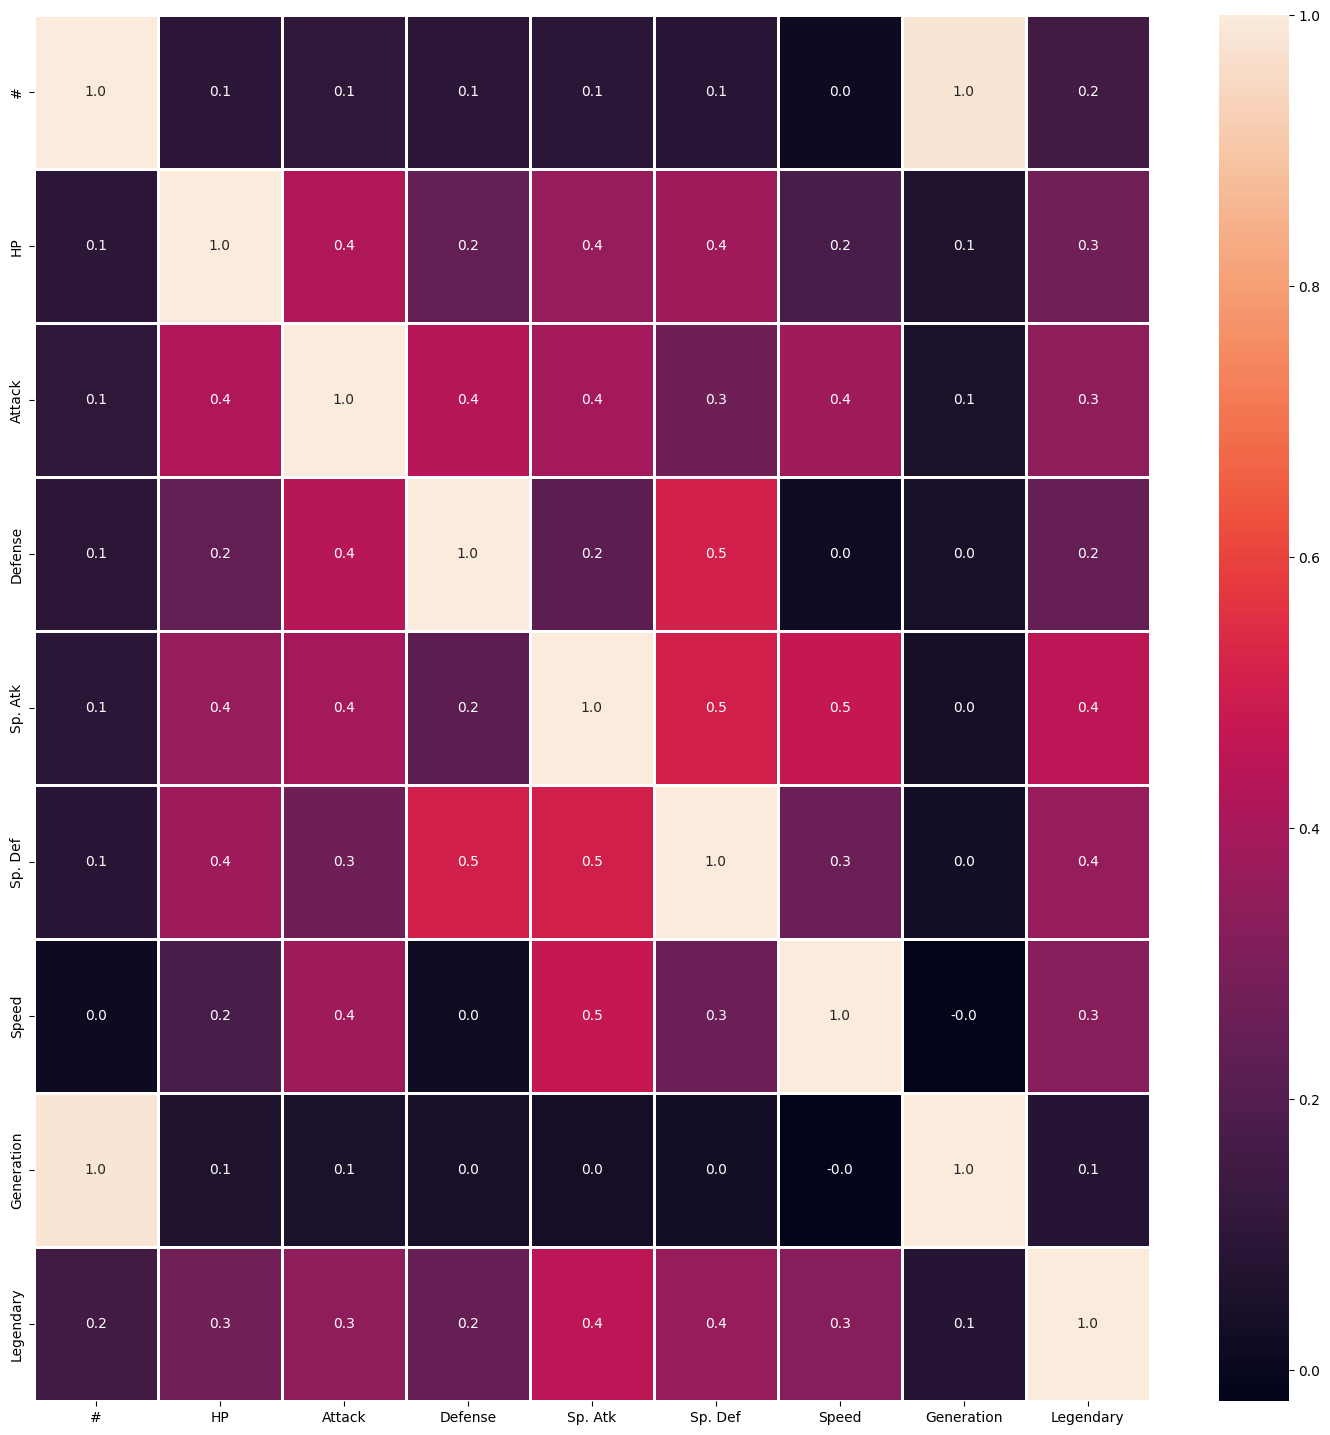

In [11]:
# melakukan corelasi map
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(data_corr.corr(), annot=True, linewidths=2, fmt= '.1f', ax=ax)
plt.show()

In [12]:
# data_corr.boxplot(column='Attack',by = 'Legendary')

<Figure size 1000x600 with 0 Axes>

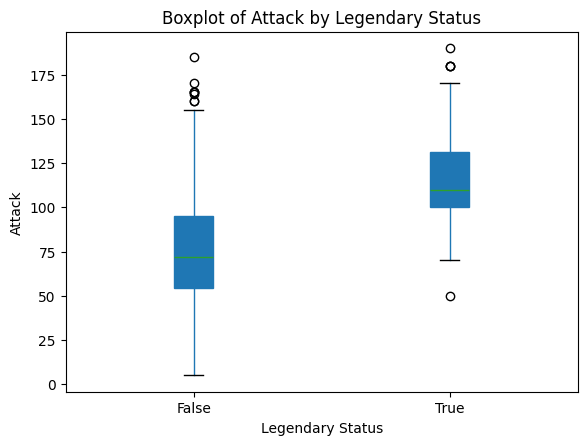

In [13]:
# Plot boxplot
plt.figure(figsize=(10, 6))
boxplot = data.boxplot(column='Attack', by='Legendary', grid=False, patch_artist=True)

# Menambahkan warna pada boxplot
colors = ['#FF9999', '#66B2FF']
for patch, color in zip(boxplot.artists, colors):
    patch.set_facecolor(color)

# Menambahkan judul dan label sumbu
plt.title('Boxplot of Attack by Legendary Status')
plt.suptitle('')  # Menghilangkan judul default untuk menghindari redundansi
plt.xlabel('Legendary Status')
plt.ylabel('Attack')

# Menampilkan plot
plt.show()

In [14]:
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [15]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### Plot Data

**MATPLOTLIB**
: Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.

* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

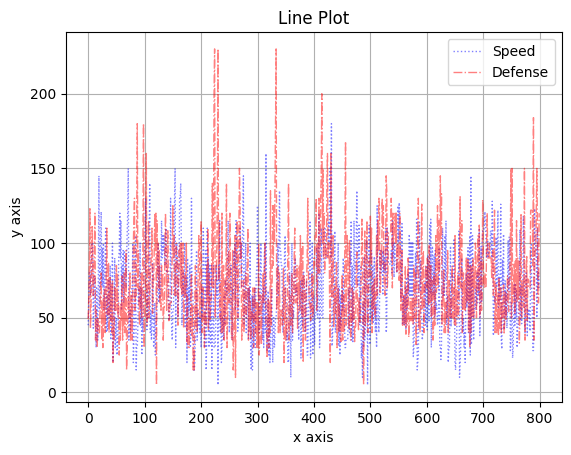

In [16]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data_corr.Speed.plot(kind = 'line', color = 'b',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data_corr.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

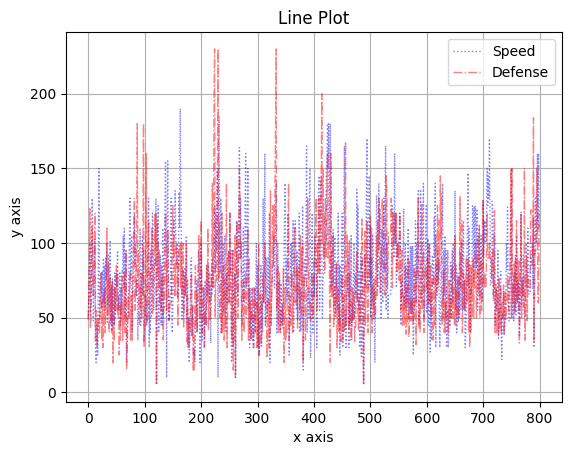

In [41]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data_corr.Attack.plot(kind = 'line', color = 'b',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data_corr.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

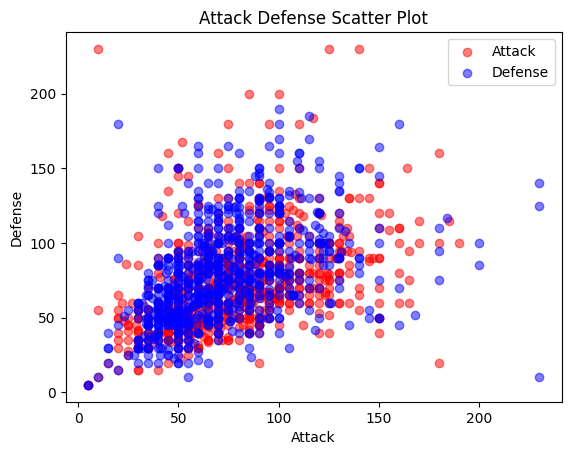

In [17]:
# Membuat scatter plot dengan warna berbeda untuk Attack dan Defense
plt.scatter(data['Attack'], data['Defense'], alpha=0.5, color='red', label='Attack')
plt.scatter(data['Defense'], data['Attack'], alpha=0.5, color='blue', label='Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

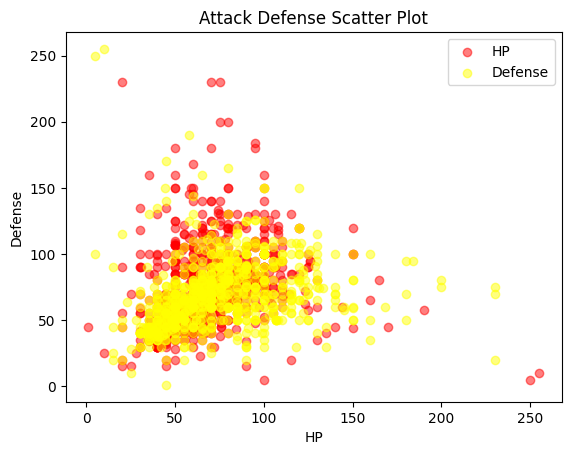

In [26]:
# Membuat scatter plot dengan warna berbeda untuk Defence dan HP
plt.scatter(data['HP'], data['Defense'], alpha=0.5, color='red', label='HP')
plt.scatter(data['Defense'], data['HP'], alpha=0.5, color='yellow', label='Defense')
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('Attack Defense Scatter Plot')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

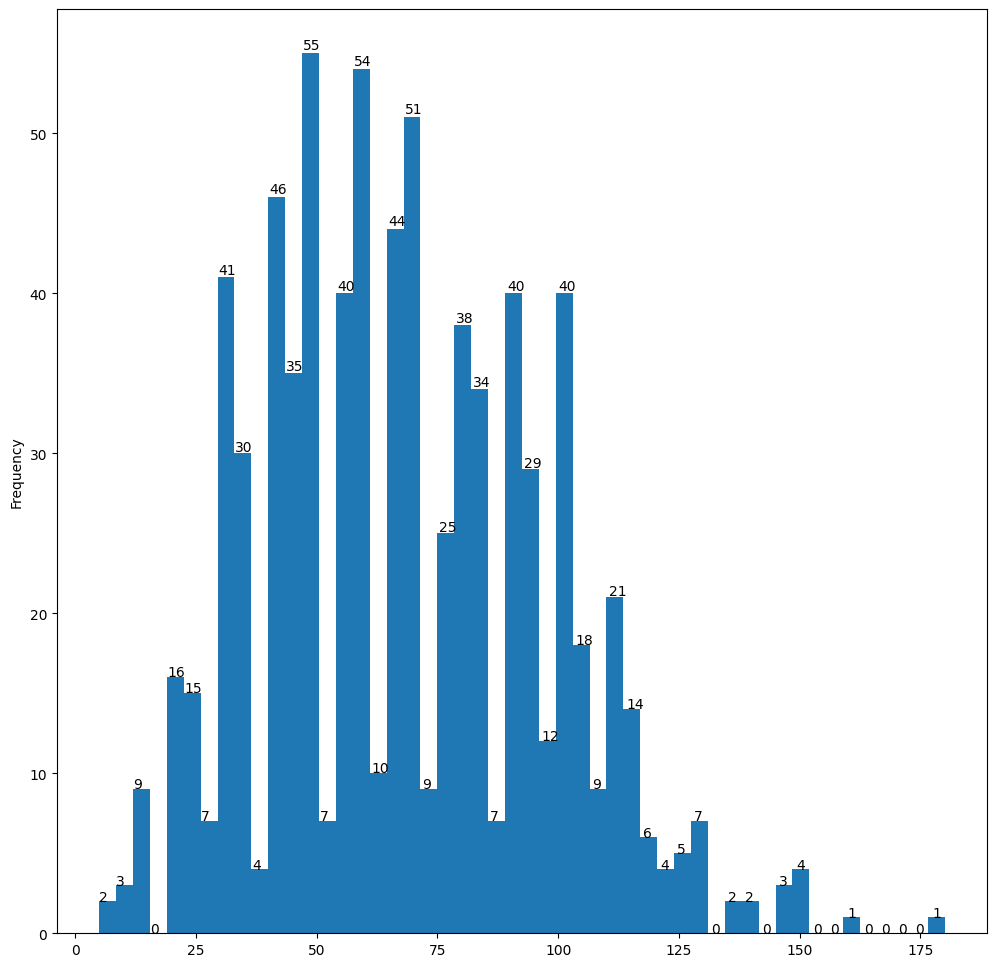

In [18]:
# Plot histogram
ax = data.Speed.plot(kind='hist', bins=50, figsize=(12,12))

# Menambahkan label nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#### Hierarchical indexing

In [22]:
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(20)

#              Name  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                                
Grass  Poison   1         Bulbasaur  45      49       49       65       65   
       Poison   2           Ivysaur  60      62       63       80       80   
       Poison   3          Venusaur  80      82       83      100      100   
       Poison   4     Mega Venusaur  80     100      123      122      120   
Fire   NaN      5        Charmander  39      52       43       60       50   
       NaN      6        Charmeleon  58      64       58       80       65   
       Flying   7         Charizard  78      84       78      109       85   
       Dragon   8  Mega Charizard X  78     130      111      130       85   
       Flying   9  Mega Charizard Y  78     104       78      159      115   
Water  NaN     10          Squirtle  44      48       65       50       64   
       NaN     11         Wartortle  59      63       80       65       80   
       NaN     12         Blastoise  79      83      100       85      105   
       NaN     13    Mega Blastoise  79     103      120      135      115   
Bug    NaN     14          Caterpie  45      30       35       20       20   
       NaN     15           Metapod  50      20       55       25       25   
       Flying  16        Butterfree  60      45       50       90       80   
       Poison  17            Weedle  40      35       30       20       20   
       Poison  18            Kakuna  45      25       50       25       25   
       Poison  19          Beedrill  65      90       40       45       80   
       Poison  20     Mega Beedrill  65     150       40       15       80   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Grass  Poison     45           1      False  
       Poison     60           1      False  
       Poison     80           1      False  
       Poison     80           1      False  
Fire   NaN        65           1      False  
       NaN        80           1      False  
       Flying    100           1      False  
       Dragon    100           1      False  
       Flying    100           1      False  
Water  NaN        43           1      False  
       NaN        58           1      False  
       NaN        78           1      False  
       NaN        78           1      False  
Bug    NaN        45           1      False  
       NaN        30           1      False  
       Flying     70           1      False  
       Poison     50           1      False  
       Poison     35           1      False  
       Poison     75           1      False  
       Poison    145           1      False

In [20]:
data1.loc["Fire","Flying"] #how to use indexes

/tmp/ipykernel_45909/166853039.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  data1.loc["Fire","Flying"]


#              Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                                  
Fire   Flying    7         Charizard   78      84       78      109       85   
       Flying    9  Mega Charizard Y   78     104       78      159      115   
       Flying  159           Moltres   90     100       90      125       85   
       Flying  271             Ho-oh  106     130       90      110      154   
       Flying  731       Fletchinder   62      73       55       56       52   
       Flying  732        Talonflame   78      81       71       74       69   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Fire   Flying    100           1      False  
       Flying    100           1      False  
       Flying     90           1       True  
       Flying     90           2       True  
       Flying     84           6      False  
       Flying    126           6      False

In [24]:
data.shape

(800, 12)

In [25]:
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

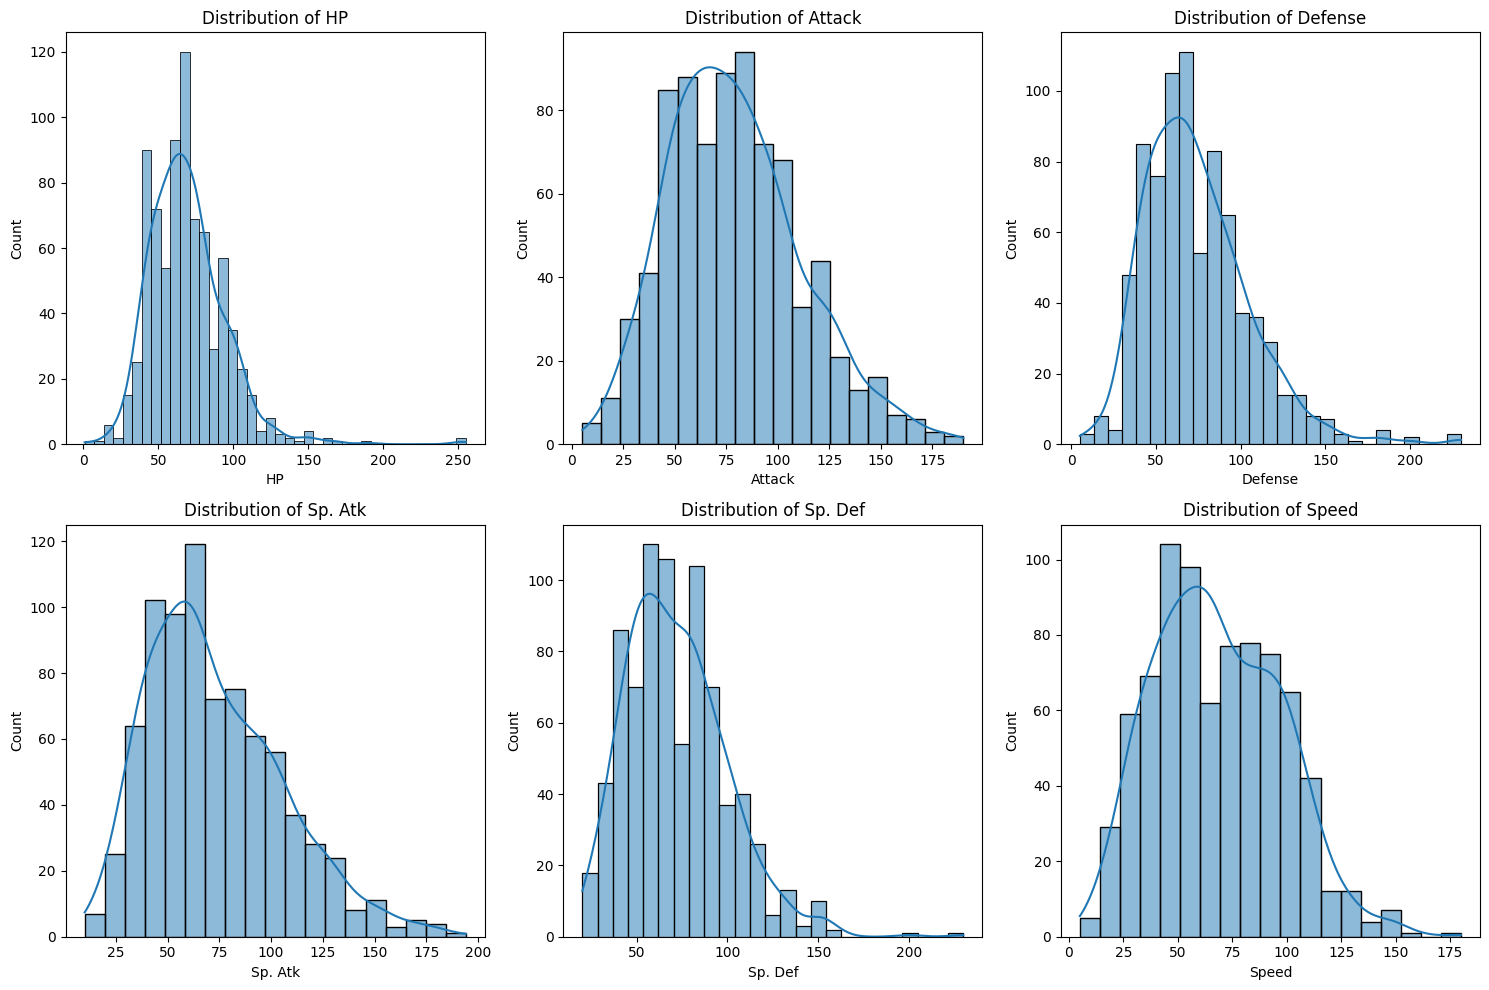

In [28]:
# 1. Distribusi setiap atribut numerik
plt.figure(figsize=(15,10))
for i, column in enumerate(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

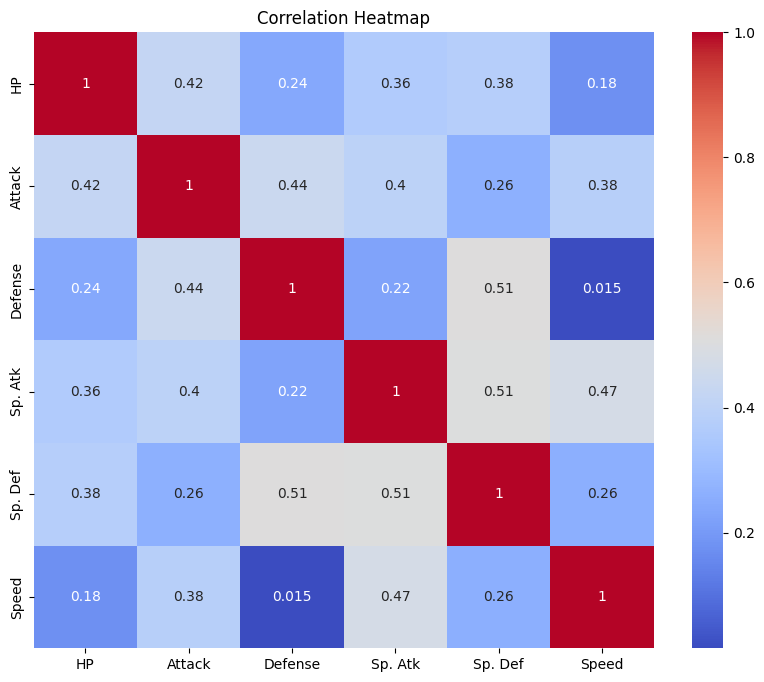

In [29]:
# 2. Heatmap korelasi antara atribut numerik
plt.figure(figsize=(10,8))
sns.heatmap(data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

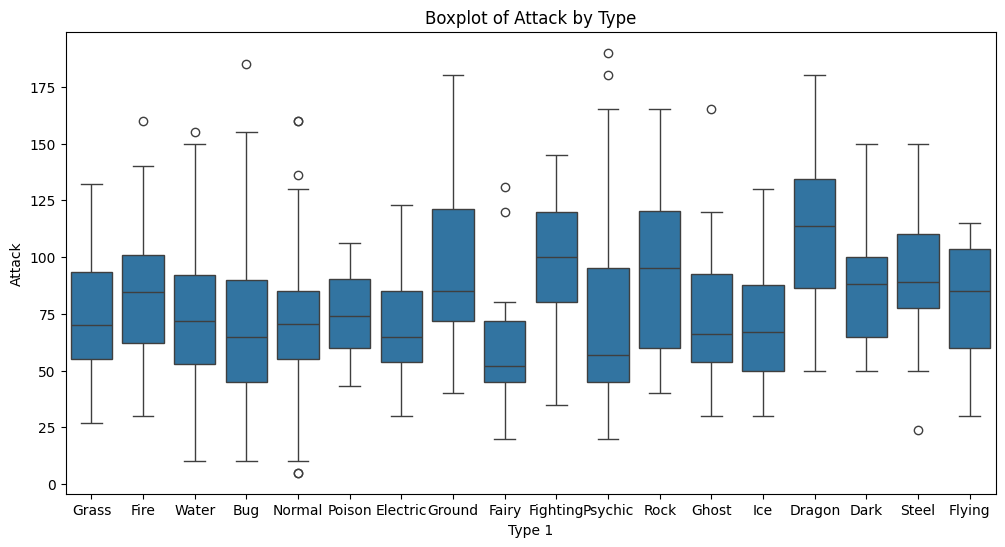

In [27]:
# 3. Boxplot Attack berdasarkan Type
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1', y='Attack', data=data)
plt.title('Boxplot of Attack by Type')
plt.show()

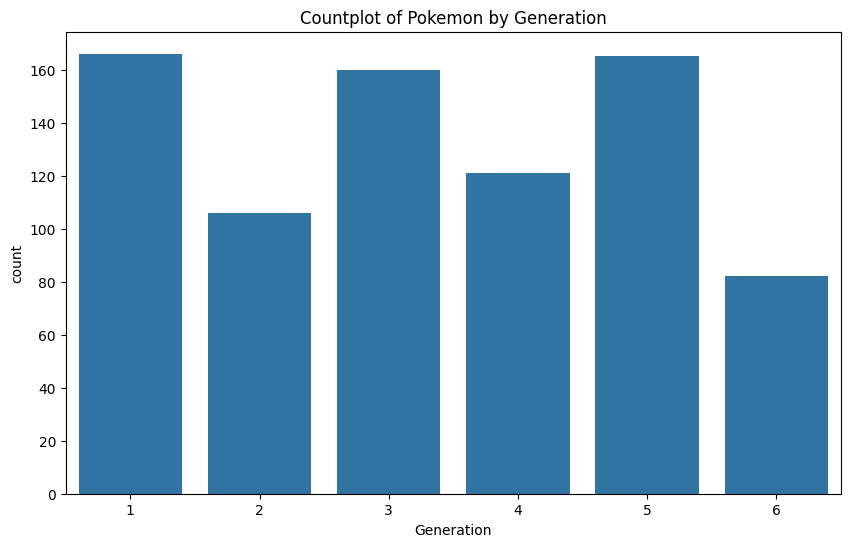

In [30]:
# 4. Countplot Pokemon berdasarkan Generation
plt.figure(figsize=(10,6))
sns.countplot(x='Generation', data=data)
plt.title('Countplot of Pokemon by Generation')
plt.show()

/tmp/ipykernel_45909/457430221.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Legendary', data=data, palette={'True': '#8D77AB', 'False': '#FF9D23'})


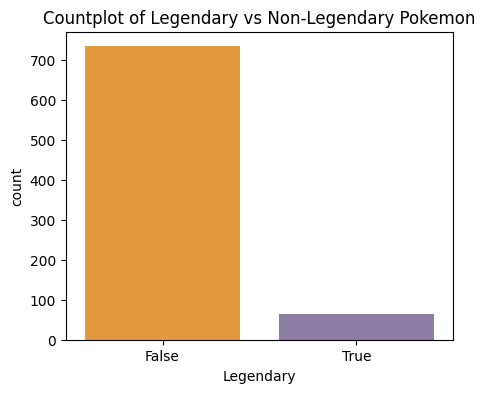

In [39]:
# 5. Countplot Pokemon Legendary vs Non-Legendary

# Convert boolean to string for palette dictionary compatibility
data['Legendary'] = data['Legendary'].astype(str)

# Countplot Pokemon Legendary vs Non-Legendary with custom colors
plt.figure(figsize=(5,4))
sns.countplot(x='Legendary', data=data, palette={'True': '#8D77AB', 'False': '#FF9D23'})
plt.title('Countplot of Legendary vs Non-Legendary Pokemon')


# Menambahkan nilai di dalam bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [42]:
# 6. Descriptive Statistics
desc_stats = data.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
               #          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    

In [47]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 49.6 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [52]:
# 7. Group By Analysis

grouped = data.groupby('Type 1').mean(numeric_only=True)
print("\nGroup By Analysis (Mean by Type 1):\n", grouped)


Group By Analysis (Mean by Type 1):
                    #         HP      Attack     Defense    Sp. Atk    Sp. Def  \
Type 1                                                                          
Bug       369.072464  56.884058   70.971014   70.724638  53.869565  64.797101   
Dark      508.387097  66.806452   88.387097   70.225806  74.645161  69.516129   
Dragon    522.843750  83.312500  112.125000   86.375000  96.843750  88.843750   
Electric  401.590909  59.795455   69.090909   66.295455  90.022727  73.704545   
Fairy     495.529412  74.117647   61.529412   65.705882  78.529412  84.705882   
Fighting  401.444444  69.851852   96.777778   65.925926  53.111111  64.703704   
Fire      361.942308  69.903846   84.769231   67.769231  88.980769  72.211538   
Flying    747.500000  70.750000   78.750000   66.250000  94.250000  72.500000   
Ghost     537.281250  64.437500   73.781250   81.187500  79.343750  76.468750   
Grass     381.414286  67.271429   73.214286   70.800000  77.500000  70.

In [50]:
# 8. Hypothesis Testing
# Example: T-test to compare Attack between Fire and Water types
fire_attack = data[data['Type 1'] == 'Fire']['Attack']
water_attack = data[data['Type 1'] == 'Water']['Attack']
t_stat, p_value = stats.ttest_ind(fire_attack, water_attack)
print("\nT-test between Fire and Water Attack:\nT-statistic:", t_stat, "\nP-value:", p_value)


T-test between Fire and Water Attack:
T-statistic: 2.2199619009627383 
P-value: 0.027809591941462368


In [51]:
# 9. Regression Analysis
# Regression analysis is used to predict the value of a dependent variable based on one or more independent variables. For example, we can predict Attack based on HP and Defense.
# Example: Linear regression to predict Attack based on HP and Defense
model = smf.ols('Attack ~ HP + Defense', data=data).fit()
print("\nRegression Analysis:\n", model.summary())

# Explanation: The regression analysis shows how HP and Defense influence Attack. The regression coefficients provide information on how much each independent variable affects the dependent variable.


Regression Analysis:
                             OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     170.2
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           2.89e-62
Time:                        08:26:23   Log-Likelihood:                -3776.4
No. Observations:                 800   AIC:                             7559.
Df Residuals:                     797   BIC:                             7573.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.8511      3.

In [53]:
# 10.ANOVA (Analysis of Variance)

anova_result = stats.f_oneway(data[data['Type 1'] == 'Grass']['Attack'],
                              data[data['Type 1'] == 'Fire']['Attack'],
                              data[data['Type 1'] == 'Water']['Attack'],
                              data[data['Type 1'] == 'Bug']['Attack'])
print("\nANOVA result for Attack across different Types:\nF-statistic:", anova_result.statistic, "\nP-value:", anova_result.pvalue)


ANOVA result for Attack across different Types:
F-statistic: 2.3631735368169218 
P-value: 0.07131187447133316


### ANOVA Results

#### Explanation of ANOVA
ANOVA (Analysis of Variance) is used to compare the means of more than two groups. In this case, we compare the mean `Attack` among different Pokemon types (Grass, Fire, Water, and Bug).

- **F-statistic**: 2.363
  - The F-statistic is the value produced by the ANOVA test. It measures how much variation exists between the groups compared to within the groups. The larger the F-statistic, the greater the difference between the groups.

- **P-value**: 0.071
  - The p-value is the probability that the observed results occurred by chance if there is no real difference between the groups. A low p-value (typically < 0.05) indicates that the differences between the groups are statistically significant.

### Conclusion
- **Not Statistically Significant**: In this result, the p-value is 0.071, which is greater than 0.05. This means we cannot reject the null hypothesis that there is no significant difference in the mean `Attack` among the different Pokemon types. In other words, the observed differences in mean `Attack` between Grass, Fire, Water, and Bug types may have occurred by chance.
- **Moderate F-statistic**: The F-statistic of 2.363 indicates that there is some variation between the groups, but it is not large enough to be considered statistically significant at the 0.05 significance level.

### Final Conclusion
Although there is some variation in the mean `Attack` among different Pokemon types, the ANOVA results show that these differences are not statistically significant. This means that, based on this data, we cannot conclude that Pokemon type has a significant impact on the mean `Attack`.

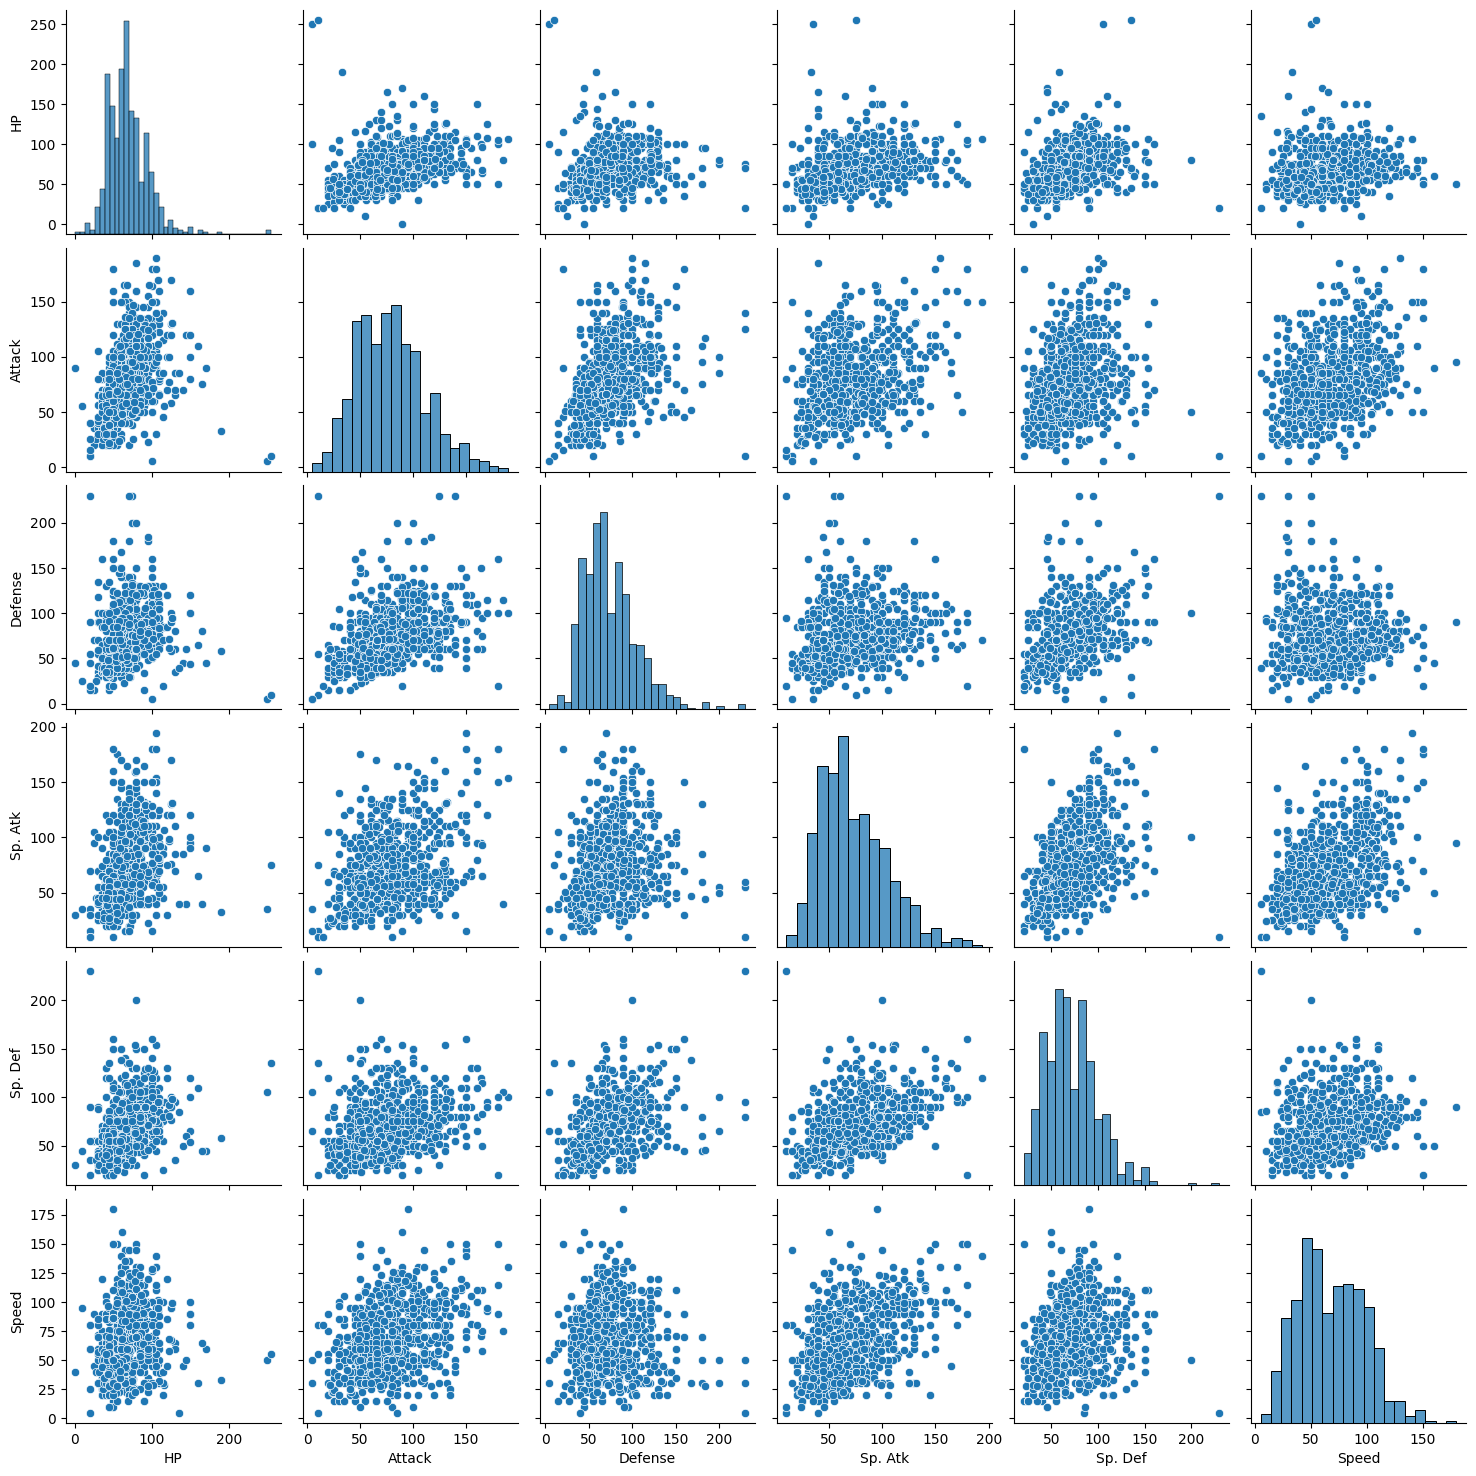

In [54]:
sns.pairplot(data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
plt.show()

In [55]:
# 11. Chi-Square Test: Test for independence between two categorical variables
contingency_table = pd.crosstab(data['Type 1'], data['Legendary'])
chi2_statistic, p_value, dof, _ = stats.chi2_contingency(contingency_table)
print("\nChi-Square Test for Independence between Type and Legendary Status:")
print("Chi-Square Statistic:", chi2_statistic)
print("P-value:", p_value)

'''
The Chi-Square Test is used to test the independence between two categorical variables. 
For example, we can test whether there is a relationship between Pokemon type (Type 1) and Legendary status.

Explanation: This Chi-Square Test examines whether there is a significant relationship between Pokemon type and Legendary status. 
A low p-value indicates a significant relationship between the two variables.
'''


Chi-Square Test for Independence between Type and Legendary Status:
Chi-Square Statistic: 90.42049130585958
P-value: 5.118547414721707e-12


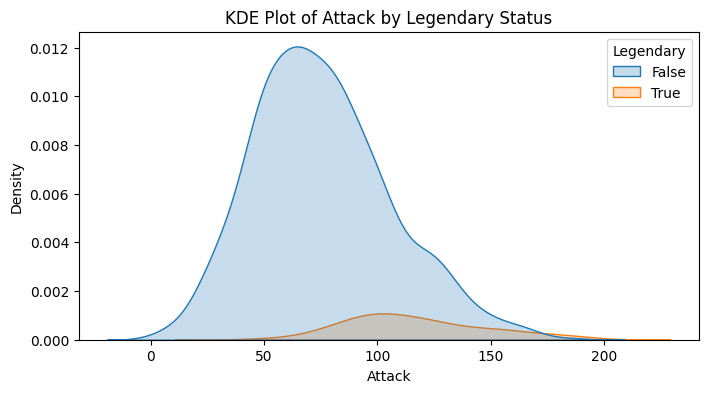

In [59]:
# Visualisasi Distribusi: KDE plot untuk melihat distribusi atribut numerik berdasarkan status Legendary
plt.figure(figsize=(8, 4))
sns.kdeplot(data=data, x='Attack', hue='Legendary', fill=True)
plt.title('KDE Plot of Attack by Legendary Status')
plt.show()